# Authors:
- Yu Mo
- Brian Smith-Eitches

## <p style="text-align: center;">MIS 284N - Big Data and Distributed Programming</p>
## <p style="text-align: center;">Project 2 - Machine Learning using Scikit and AWS</p>
## <p style="text-align: center;">Total points: 100</p>
## <p style="text-align: center;">Due: Friday, October 4 submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

This project is about giving exposure about Machine learning, its usage, Cloud services and why they are helpful in analyzing Big Data.

In this Project, we are trying to analyze the crime data. This data is taken from <a href=https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2/data> here </a>. You have to download data from here, it should be around 1.6 GB in size. You have to predict type of crime that can happen given the features.

You have to complete all the four tasks and report your observations for each if any.

Note: Please post clarification questions on Piazza. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
import time

In [2]:
crime_df = pd.read_csv('crimes16-19.csv')

# Task 1 - Read the data and filter the data you need

This is open ended, you can use any features you want and drop any one of them. The 'Primary Type' is our target variable which we will be predicting for.
This task is split into multiple parts:


1.   Print the Histogram of variable 'Primary Type'. The x-axis should be each primary type, and the y-axis will the the count of each Primary type.
2. Sort the histogram in decreasing order. This will help you to understand which Primary Type of crime occured more than the rest. 
3. Now, 'K' is the total number of classes in Primary Type. Experiment with K=2,3,4,5 as the most popular Primary Type data to be used and predicted. 
4.  Given a percentage 'P', find the most number of 'K' your local system can handle during data loading, training and prediction. Report that 'K'. Ideally, you should test for a 'P' value of 60%. Meaning, you should have used 60% of the total data you are given. If you are given 1000 samples, you should use at least 600 samples and split that into train and test. 
5.  For each K=2,3,4,5 and percentage 'P', you should have trained a model and report the accuracy. (Refer to other tasks)
Hint: Split your data for each k=2,3,4,5 and P values and run individual models on them. 
Split the data into training and testing in the ratio of 80:20.

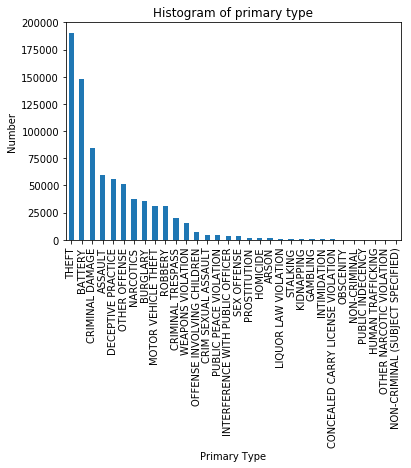

In [3]:
#1.1 and 1.2
counts = crime_df["Primary Type"].value_counts()
counts.plot.bar()
plt.title("Histogram of primary type")
plt.xlabel("Primary Type")
plt.ylabel("Number")
plt.show()

1.3 is covered in 1.5

In [4]:
#1.4
given_p = float(input("Give desired percentage (.6 for 60%): "))
k = 2
# To pick top k crime types
crimes = [x[0] for x in counts[:k].items()]
k_crimes = crime_df.loc[crime_df['Primary Type'].isin(crimes)]
p = len(k_crimes.index) / len(crime_df.index)
while p < given_p:
    k += 1
    crimes = [x[0] for x in counts[:k].items()]
    k_crimes = crime_df.loc[crime_df['Primary Type'].isin(crimes)]
    p = len(k_crimes.index) / len(crime_df.index)
print("K value that first exceeds given P value of {} is K {} with actual P of {}".format(given_p,k,round(p,4)))

Give desired percentage (.6 for 60%): .6
K value that first exceeds given P value of 0.6 is K 4 with actual P of 0.6087


1.5 is below in task

In [5]:
#1.5 For this task, we choose the model of K Nearest Neighbors
for k in range(2,6):
    crimes = [x[0] for x in counts[:k].items()]
    t0 = time.process_time()
    k_crimes = crime_df.loc[crime_df['Primary Type'].isin(crimes)].drop(['ID','Case Number','Date','Block',
                                     'FBI Code','Location','Description',
                                     'Location Description','Updated On'],
                                    axis=1).dropna()
    
    X = k_crimes.drop('Primary Type', axis=1)
    
    # Convert categorical data into numerical data to fit into scikit learn library
    X = pd.get_dummies(X)
    
    y = k_crimes['Primary Type']
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=0)
    
    #Train and test model
    n_neigh = 5
    neigh = KNeighborsClassifier(n_neighbors=n_neigh)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    
    p = len(k_crimes.index) / len(crime_df.index)
    process_time = time.process_time() - t0
    print(pd.Series([int(k),p*100,accuracy*100, process_time], index = ['k','p','accuracy','time']))
    print()

k            2.000000
p           42.159722
accuracy    72.456490
time        18.750000
dtype: float64

k            3.000000
p           52.709069
accuracy    58.008897
time        25.859375
dtype: float64

k            4.000000
p           60.173749
accuracy    50.972566
time        34.406250
dtype: float64

k            5.000000
p           66.772716
accuracy    47.300124
time        49.812500
dtype: float64



# Task 2 - Convert the features in a form that can be given as input to scikit library/functions

Here you have to search a little bit. The data that we are using has data other than numerical values. The model takes values as numerical or categorical data. You need to convert the input data to either one of these forms. 

**Local Machine time to process data and convert**

In [6]:
t0 = time.process_time()
features_crime_df = pd.get_dummies(crime_df.dropna().drop(['ID','Case Number','Date','Block',
                                     'FBI Code','Location','Description',
                                     'Location Description','Updated On','Primary Type'],
                                    axis=1))
features_crime_df["Primary Type"] = crime_df.dropna()["Primary Type"]
print(f'Local time to process data and convert is {time.process_time() - t0:,} s')

Local time to process data and convert is 7.9375 s


**AWS time to process data and convert**

In [7]:
t0 = time.process_time()
features_crime_df = pd.get_dummies(crime_df.dropna().drop(['ID','Case Number','Date','Block',
                                     'FBI Code','Location','Description',
                                     'Location Description','Updated On','Primary Type'],
                                    axis=1))
features_crime_df["Primary Type"] = crime_df.dropna()["Primary Type"]
print(f'AWS time to process data and convert is {time.process_time() - t0:,} s')

AWS time to process data and convert is 8.203125 s


# Task 3 - Build the model

Once the features are made converted to the form accepted by scikit library, you have to build a machine learning model. Given the features predict the type of crime. 
Report the accuracy, F1, Precision and Recall of the model.

**Build model with accuracy, f1, precision, and recall values on local machine**

In [8]:
# In this task, we choose K Nearest Neighbors
k = int(input("Give a k value (or leave blank for default value of 4):") or 4)

crimes = [x[0] for x in counts[:k].items()]
k_crimes = features_crime_df.loc[features_crime_df['Primary Type'].isin(crimes)]
X = k_crimes.drop('Primary Type', axis=1)
y = k_crimes['Primary Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#train and test model
n_neigh = 5
neigh = KNeighborsClassifier(n_neighbors=n_neigh)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

p = len(k_crimes.index) / len(features_crime_df.index)
accuracy = accuracy_score(y_test, y_pred)
prec, rec, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(pd.Series(['K Nearest Neighbors', n_neigh, k, p*100, accuracy*100, fscore, prec,rec,
                'local'], 
            index = ['Model', 'K neighbors', 'k', 'p (%)','Accuracy','F1','Precision','Recall',
                     'Machine']))

Give a k value (or leave blank for default value of 4):
Model          K Nearest Neighbors
K neighbors                      5
k                                4
p (%)                      61.3053
Accuracy                   50.9594
F1                         0.50371
Precision                 0.505346
Recall                    0.509594
Machine                      local
dtype: object


# Task 4 - Run the model on your laptop and AWS cloud and observe the time taken for reading the data, training and testing, report the same.  

Report your observations. Due to more RAM needed for the same, it might be the case that it doesn't run on your laptop, so in that case report your laptop configuration and state it didnt run.

In [7]:
# Run on local machine
# In this task, we choose K Nearest Neighbors
k = int(input("Give a k value (or leave blank for default value of 4):") or 4)
t0 = time.process_time()

crimes = [x[0] for x in counts[:k].items()]
k_crimes = features_crime_df.loc[features_crime_df['Primary Type'].isin(crimes)]
X = k_crimes.drop('Primary Type', axis=1)

y = k_crimes['Primary Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

t1 = time.process_time()
data_time = t1-t0

n_neigh = 5
neigh = KNeighborsClassifier(n_neighbors=n_neigh)
neigh.fit(X_train, y_train)

t_train = time.process_time() - t1
t2 = time.process_time()
y_pred = neigh.predict(X_test)
t_test = time.process_time() - t2
p = len(k_crimes.index) / len(features_crime_df.index)

accuracy = accuracy_score(y_test, y_pred)
model_time = time.process_time() - t1
prec, rec, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(pd.Series(['K Nearest Neighbors', n_neigh, k, p*100, accuracy*100, fscore, prec,rec,
                 f'{data_time:,}',f'{t_train:,}', f'{t_test:,}', f'{model_time:,}', 'Local'], 
            index = ['Model', 'K neighbors', 'k', 'p (%)','Accuracy','F1','Precision','Recall',
                     'Data Processing/Feature Conversion Time (s)','Model Train Time (s)','Model Test Time (s)','Model Train & Test Time (s)',
                     'Machine']))

Give a k value (or leave blank for default value of 4):
Model                                          K Nearest Neighbors
K neighbors                                                      5
k                                                                4
p (%)                                                      61.3053
Accuracy                                                   50.9594
F1                                                         0.50371
Precision                                                 0.505346
Recall                                                    0.509594
Data Processing/Feature Conversion Time (s)               4.046875
Model Train Time (s)                                       55.4375
Model Test Time (s)                                      53.015625
Model Train & Test Time (s)                             108.671875
Machine                                                      Local
dtype: object


In [8]:
# Run on AWS
# In this task, we choose K Nearest Neighbors
k = int(input("Give a k value (or leave blank for default value of 4):") or 4)
t0 = time.process_time()

crimes = [x[0] for x in counts[:k].items()]
k_crimes = features_crime_df.loc[features_crime_df['Primary Type'].isin(crimes)]
X = k_crimes.drop('Primary Type', axis=1)

y = k_crimes['Primary Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

t1 = time.process_time()
data_time = t1-t0

n_neigh = 5
neigh = KNeighborsClassifier(n_neighbors=n_neigh)
neigh.fit(X_train, y_train)

t_train = time.process_time() - t1
t2 = time.process_time()
y_pred = neigh.predict(X_test)
t_test = time.process_time() - t2
p = len(k_crimes.index) / len(features_crime_df.index)

accuracy = accuracy_score(y_test, y_pred)
model_time = time.process_time() - t1
prec, rec, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(pd.Series(['K Nearest Neighbors', n_neigh, k, p*100, accuracy*100, fscore, prec,rec,
                 f'{data_time:,}',f'{t_train:,}', f'{t_test:,}', f'{model_time:,}', 'AWS'], 
            index = ['Model', 'K neighbors', 'k', 'p (%)','Accuracy','F1','Precision','Recall',
                     'Data Processing/Feature Conversion Time (s)','Model Train Time (s)','Model Test Time (s)','Model Train & Test Time (s)',
                     'Machine']))

Give a k value (or leave blank for default value of 4):
Model                                          K Nearest Neighbors
K neighbors                                                      5
k                                                                4
p (%)                                                      61.3053
Accuracy                                                   50.9594
F1                                                         0.50371
Precision                                                 0.505346
Recall                                                    0.509594
Data Processing/Feature Conversion Time (s)                 4.3125
Model Train Time (s)                                     55.796875
Model Test Time (s)                                         54.125
Model Train & Test Time (s)                               110.1875
Machine                                                        AWS
dtype: object


From the results shown above, we can find that same codes run on AWS platform is faster than that on local machines.

# Task 5 - Run K-fold cross validation and report the accuracy for a cv = 5. 
Report the total amount of time taken to run it on your laptop and AWS

In [9]:
from sklearn.model_selection import cross_val_score
# Get used dataset

k = int(input("Give a k value (or leave blank for default value of 4):") or 4)
t0 = time.process_time()
crimes = [x[0] for x in counts[:k].items()]
k_crimes = features_crime_df.loc[features_crime_df['Primary Type'].isin(crimes)]
X = k_crimes.drop('Primary Type', axis=1)
y = k_crimes['Primary Type']
t_data = time.process_time() - t0
n_neigh = 5
p = len(k_crimes.index) / len(features_crime_df.index)
t_start = time.process_time()
kneigh = KNeighborsClassifier(n_neighbors=n_neigh)
scores = cross_val_score(kneigh, X, y, cv=5)
t_valid = time.process_time() - t_start
print(pd.Series(['K Nearest Neighbors', n_neigh, k, p*100, scores.mean()*100, 
                 f'{t_data:,}',f'{t_valid:,}', 'local'], 
            index = ['Model', 'N neighbors', 'k', 'p (%)','Accuracy',
                     'Data Processing/Feature Conversion Time (s)','Cross Validation Time (s)', 'Machine']))

Give a k value (or leave blank for default value of 4):
Model                                          K Nearest Neighbors
N neighbors                                                      5
k                                                                4
p (%)                                                      61.3053
Accuracy                                                   49.4475
Data Processing/Feature Conversion Time (s)               2.015625
Cross Validation Time (s)                                554.15625
Machine                                                      local
dtype: object


In [ ]:
# Run on AWS
from sklearn.model_selection import cross_val_score
# Get used dataset

k = int(input("Give a k value (or leave blank for default value of 4):") or 4)
t0 = time.process_time()
crimes = [x[0] for x in counts[:k].items()]
k_crimes = features_crime_df.loc[features_crime_df['Primary Type'].isin(crimes)]
X = k_crimes.drop('Primary Type', axis=1)
y = k_crimes['Primary Type']
t_data = time.process_time() - t0
n_neigh = 5
p = len(k_crimes.index) / len(features_crime_df.index)
t_start = time.process_time()
kneigh = KNeighborsClassifier(n_neighbors=n_neigh)
scores = cross_val_score(kneigh, X, y, cv=5)
t_valid = time.process_time() - t_start
print(pd.Series(['K Nearest Neighbors', n_neigh, k, p*100, scores.mean()*100, 
                 f'{t_data:,}',f'{t_valid:,}', 'AWS'], 
            index = ['Model', 'N neighbors', 'k', 'p (%)','Accuracy',
                     'Data Processing/Feature Conversion Time (s)','Cross Validation Time (s)', 'Machine']))